# Ex06 - Primeiros passos para a Transformada de Fourier

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import fft2, ifft2
import sys,os
ia898path = os.path.abspath('../../')
if ia898path not in sys.path:
    sys.path.append(ia898path)
import ia898.src as ia
from PIL import Image


In [10]:
def normalize(f, range=[0,255]):

    f = np.asarray(f)
    range = np.asarray(range)
    if f.dtype.char in ['D', 'F']:
        raise Exception('error: cannot normalize complex data')
    faux = np.ravel(f).astype(float)
    minimum = faux.min()
    maximum = faux.max()
    lower = range[0]
    upper = range[1]
    if upper == lower:
        g = np.ones(f.shape) * maximum
    if minimum == maximum:
        g = np.ones(f.shape) * (upper + lower) / 2.
    else:
        g = (faux-minimum)*(upper-lower) / (maximum-minimum) + lower
    g = g.reshape(f.shape)

    if f.dtype == np.uint8:
        if upper > 255: 
            raise Exception('normalize: warning, upper valuer larger than 255. Cannot fit in uint8 image')
    if lower == 0 and upper == 255:
        g = g.astype(np.uint8)
    else:
        g = g.astype(f.dtype) # set data type of result the same as the input image
    return g

## Resolução Exercício 1

In [11]:
def cosseno_2d((N,M), t, teta, phi):
    r, c = np.indices([N,M])
    tc = t / np.cos(teta)
    tr = t / np.sin(teta)
    f = np.cos(2*np.pi*(r/tr + c/tc) + phi)
    return f

def cosseno_1d(a, freq, fs, N, phi):
    t = np.linspace(0, fs, N)
    x = a*np.cos((2*np.pi*freq*t)+phi)
    return x

#### Ondas 1D

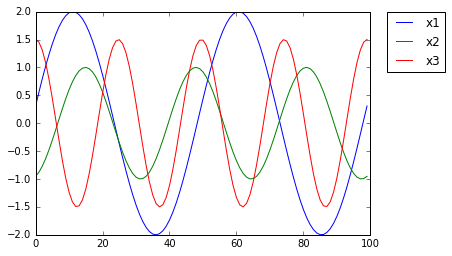

In [12]:
x1 = cosseno_1d(2, 100, 200, 100, 30)
x2 = cosseno_1d(1, 150, 200, 100, 60)
x3 = cosseno_1d(1.5, 200, 200, 100, 0)
plt.plot(x1, label='x1')
plt.plot(x2, label='x2')
plt.plot(x3, label='x3')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

Podemos observar acima as diferentes configurações de cossenóides em termos de frequência, amplitude e fase.

#### Ondas 2D

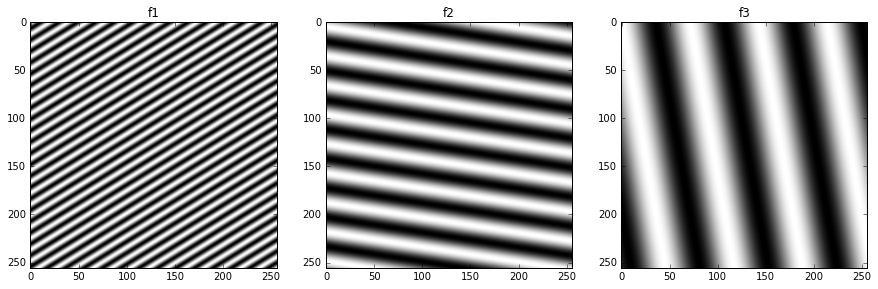

In [13]:
f1 = cosseno_2d((256,256), 10, 45, 150)
f2 = cosseno_2d((256, 256), 30, 30, 20 )
f3 = cosseno_2d((256, 256), 70, 270, 0)

fig, ax = plt.subplots(1, 3, figsize=(15,15))
ax[0].imshow(f1, cmap='gray')
ax[1].imshow(f2, cmap='gray')
ax[2].imshow(f3, cmap='gray')

ax[0].set_title('f1')
ax[1].set_title('f2')
ax[2].set_title('f3')
plt.show()

Podemos observar diferentes configurações utilizando a função de cosseno de duas dimensões. É possível notar os ciclos por pixel em cada uma das imagens, ou seja, quanto maior o período menos ciclos e vice-versa.

## Resolução Exercício 2

In [14]:
#fig = mpimg.imread('../data/redqueen.jpg')
#plt.imshow(fig, cmap='gray')
img = Image.open('../data/redqueen.jpg').convert('L')

#### Translação periódica 1

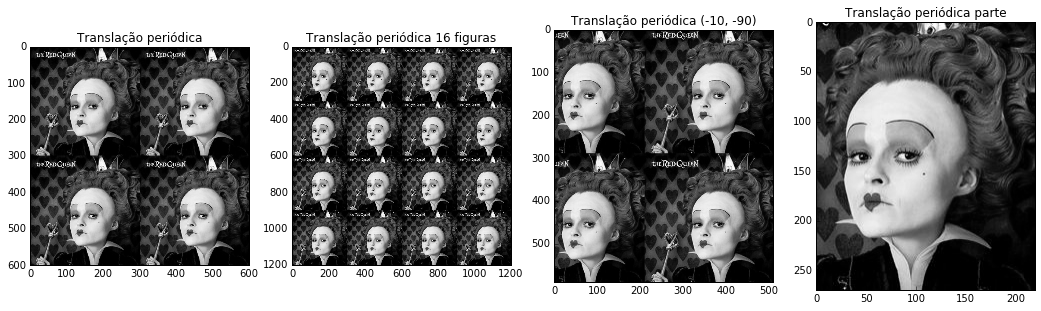

In [15]:
figura = np.array((img))

def trans_periodica(figure):
    figure2 = np.vstack((figure,figure))
    figure4 = np.hstack((figure2,figure2))
    return figure4

def trans_periodica_8(figure):
    figure2 = np.vstack((figure,figure))
    figure4 = np.hstack((figure2,figure2))
    figure6 = np.vstack((figure4,figure4))
    figure8 = np.hstack((figure6,figure6))
    return figure8

def trans_periodica_parte(figure, (dh,dw)):
    h,w = figure.shape
    dhi = (-dh + h) % h # mapeamento inverso igual feito em iaffine (inversa de T)
    dwi = (-dw + w) % w # mapeamento inverso
    g = figure[dhi:dhi+h,dwi:dwi+w]
    return g

y1 = trans_periodica(figura)
y2 = trans_periodica_parte(y1, (-10, -90))
#y9 = trans_periodica_parte(y1, (-90, -10))
y4 = trans_periodica_8(figura)
y3 = trans_periodica_parte(figura, (-30, -80))
#y10 = trans_periodica_parte(figura, (0, -100))

fig2, ax = plt.subplots(1,4, figsize=(18,18))
ax[0].imshow(y1, cmap='gray')
ax[1].imshow(y4, cmap='gray')
ax[2].imshow(y2, cmap='gray')
ax[3].imshow(y3, cmap='gray')


ax[0].set_title(u'Translação periódica')
ax[1].set_title(u'Translação periódica 16 figuras')
ax[2].set_title(u'Translação periódica (-10, -90)')
ax[3].set_title(u'Translação periódica parte')
#ax[1].set_title(u'Translação periódica parte2')

plt.show()

In [16]:
def ptrans(f,t):
    g = np.empty_like(f) 
    if f.ndim == 1:
      W = f.shape[0]
      col = np.arange(W)
      g = f[(col-t)%W]
    elif f.ndim == 2:
      H,W = f.shape
      rr,cc = t
      row,col = np.indices(f.shape)
      g = f[(row-rr)%H, (col-cc)%W]
    elif f.ndim == 3:
      Z,H,W = f.shape
      zz,rr,cc = t
      z,row,col = np.indices(f.shape)
      g = f[(z-zz)%Z, (row-rr)%H, (col-cc)%W]
    return g

def ptrans2d(f,t):
    rr,cc = t
    H,W = f.shape
    
    r = rr%H
    c = cc%W
        
    g = np.empty_like(f)
    
    g[:r,:c] = f[H-r:H,W-c:W]
    g[:r,c:] = f[H-r:H,0:W-c]
    g[r:,:c] = f[0:H-r,W-c:W]
    g[r:,c:] = f[0:H-r,0:W-c]

    return g

#### Translação periódica 2

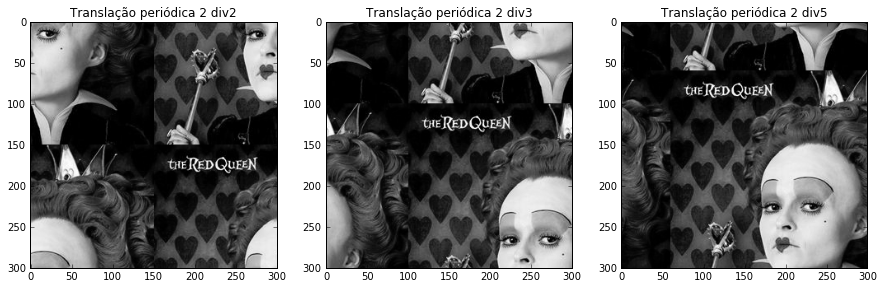

In [17]:
y5 = ptrans(figura, np.array(figura.shape)//2)
y6 = ptrans(figura, np.array(figura.shape)//3)
y7 = ptrans(figura, np.array(figura.shape)//5)

fig3, ax = plt.subplots(1,3, figsize=(15,15))
ax[0].imshow(y5, cmap='gray')
ax[1].imshow(y6, cmap='gray')
ax[2].imshow(y7, cmap='gray')
#ax[3].imshow(y8, cmap='gray')
              
ax[0].set_title(u'Translação periódica 2 div2')
ax[1].set_title(u'Translação periódica 2 div3')
ax[2].set_title(u'Translação periódica 2 div5')
#ax[3].set_title(u'Translação periódica div5 (ptrans2d)')
plt.show()

#### Translação periódica 3

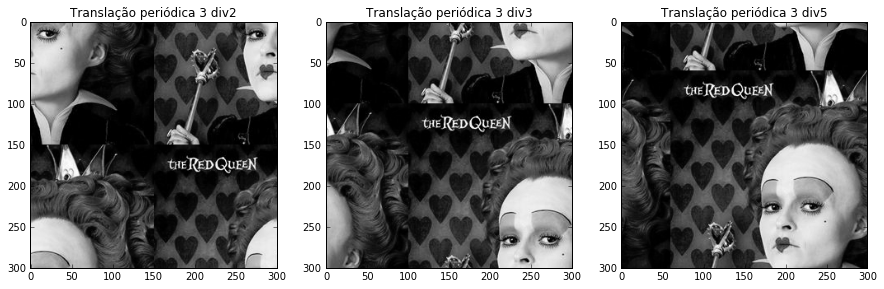

In [18]:
y8 = ptrans2d(figura, np.array(figura.shape)//2)
y9 = ptrans2d(figura, np.array(figura.shape)//3)
y10 = ptrans2d(figura, np.array(figura.shape)//5)


fig3, ax = plt.subplots(1,3, figsize=(15,15))
ax[0].imshow(y8, cmap='gray')
ax[1].imshow(y9, cmap='gray')
ax[2].imshow(y10, cmap='gray')
#ax[3].imshow(y8, cmap='gray')
              
ax[0].set_title(u'Translação periódica 3 div2')
ax[1].set_title(u'Translação periódica 3 div3')
ax[2].set_title(u'Translação periódica 3 div5')
#ax[3].set_title(u'Translação periódica div5 (ptrans2d)')
plt.show()

A translação periódica 1 é possível concatenar as imagens com diferentes quantidades de imagens, entretanto conforme aumenta o número de imagens concatenadas também aumenta o tamanho da imagem final. Além disso, pode-se notar que a translação periódica altera o tamanho da imagem. Diferente da translação 1, as translações periódicas 2 e 3 não alteram o tamanho da imagem. Além do mais, é possível notar que as translações podem ser configuradas de várias maneiras sem alterar o tamanho da imagem final. A vantagem de se utilizar a translação 1, seria para a segmentação de imagens, ou seja, a imagem final será apenas a parte selecionada com um tamanho reduzido em relação à original. 


In [19]:
print 'Translação periódica 1'
%timeit y1 = trans_periodica(figura)

Translação periódica 1
1000 loops, best of 3: 278 µs per loop


In [20]:
print 'Translação periódica 2'
%timeit y5 = ptrans(figura, np.array(figura.shape)//2)

Translação periódica 2
100 loops, best of 3: 9.11 ms per loop


In [21]:
print 'Translação periódica 3'
%timeit y8 = ptrans2d(figura, np.array(figura.shape)//2)

Translação periódica 3
1000 loops, best of 3: 102 µs per loop


Podemos concluir que utilizando a translação periódica 3 é mais rápida em relação as outras translações, isso ocorre devido a estrutura da função ser baseada em slice e não indexação, como o caso da translação 2.

## Resolução Exercício 3

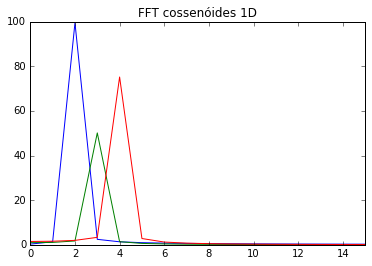

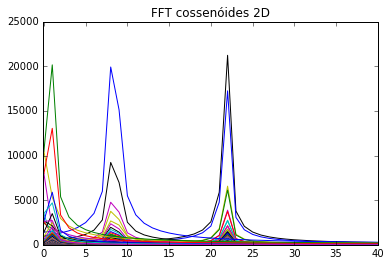

In [22]:
x1f = np.abs(np.fft.fft(x1))
x2f = np.abs(np.fft.fft(x2))
x3f = np.abs(np.fft.fft(x3))

plt.plot(x1f, label='fft x1')
plt.plot(x2f, label='fft x2')
plt.plot(x3f, label='fft x3')
plt.title(u'FFT cossenóides 1D')
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlim(0,15)
plt.show()

f1f = np.abs(np.fft.fft2(f1))
f2f = np.abs(np.fft.fft2(f2))
f3f = np.abs(np.fft.fft2(f3))

plt.plot(f1f, label='fft f1')
plt.plot(f2f, label='fft f2')
plt.plot(f3f, label='fft f3')
plt.title(u'FFT cossenóides 2D')
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlim(-0.1,40)
plt.show()

Nos gráficos acima foram plotadas as cossenóides de 1D e 2D respectivamente. No primeiro gráfico, podemos observar que são impulsos que representam as frequências utilizadas, entretanto não são perfeitos devido as descontinuidades do sinal quando calculada a fft. Na segunda imagem, podemos observar os impulsos das imagens, as descontinuidades e as suas harmônicas. Desse maneira, fica muito difícil verificar as informações.

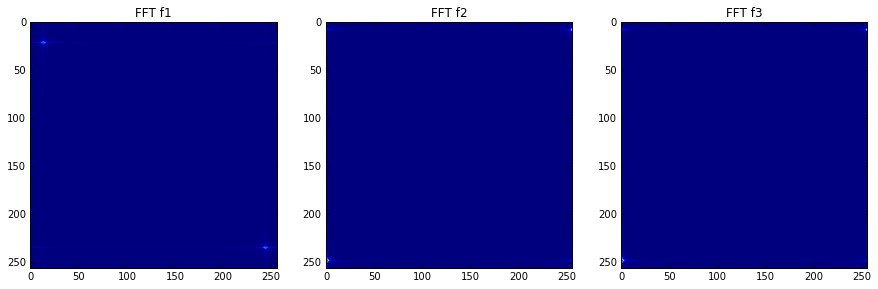

In [23]:
fig4, ax = plt.subplots(1,3, figsize=(15,15))
ax[0].imshow(f1f)#, cmap='gray')
ax[1].imshow(f2f)#, cmap='gray')
ax[2].imshow(f2f)#, cmap='gray')

ax[0].set_title('FFT f1')
ax[1].set_title('FFT f2')
ax[2].set_title('FFT f3')
plt.show()

O espectro das cossenóides 2D utilizando a função imshow, é possível observar os pontos de ciclos representados pelas amostras. Pode-se notar os pontos reais e complexos. Entretanto, esses pontos não são bem definidos devido a descontinuidade causada pela fft. Para melhorar isso, pode se utilizar janelas para reduzir esse vazamento de frequência. Obs.: foi mostrado em colorido para uma melhor visualização.

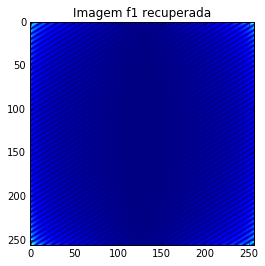

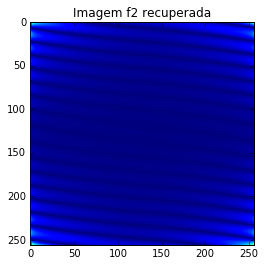

In [24]:
fff1 = np.abs(np.fft.fft2(f1f))

plt.imshow(fff1)
plt.title('Imagem f1 recuperada')
plt.show()

fff2 = np.abs(np.fft.fft2(f2f))

plt.imshow(fff2)
plt.title('Imagem f2 recuperada')
plt.show()

Nesse caso, utilizamos a transformada inversa da fft para recuperar as imagens. Pode se notar que as informações relevantes são mais fáceis de observar próximo aos pontos reais e conjugados visualizados nos espectros anteriores, ou seja, nos cantos dos espectros. Obs.: foi mostrado em colorido para uma melhor visualização.

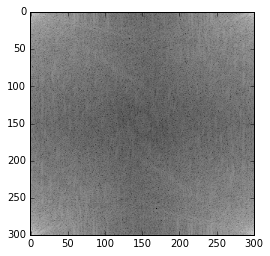

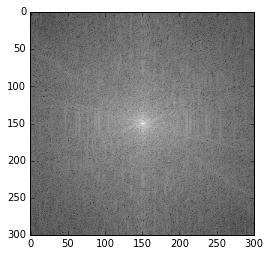

In [25]:
ff = figura
F = np.abs(np.fft.fft2(ff))
h,w = figura.shape

def myfft2(figure):
    h,w = figure.shape
    F = np.abs(np.fft.fft2(figure))
    Ff = np.log(ptrans(F, (h//2, w//2))+1)
    return Ff

plt.imshow(normalize(np.log(F)), cmap='gray')
plt.show()

FF = myfft2(ff)

plt.imshow(normalize(FF), cmap='gray')
plt.show()

#ia.adshow(ia.normalize(np.log(np.abs(ia.ptrans(F,(h//2,w//2))+1))), [0,255])

Podemos observar que utilizando a translação periódica, é possível mover os pontos dos cantos para o centro do espectro. 